replicating local resources


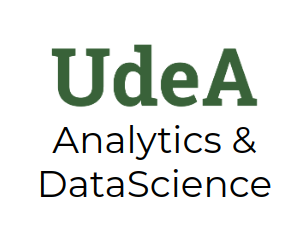

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image
Image("local/imgs/udea-datascience.png")


# **MODELO MACHINE LEARNING PARA LA PREDICCIÓN**
# **ANTICIPADA DE INSOLVENCIA EN EMPRESAS**


> **Laura Sofía Caita Giraldo**
>>Código: 1019138613
>>> Universidad de Antioquia



## ETAPA 0: OBTENCIÓN DE DATOS

### Paso 0.1 - Importación de las librerías necesarias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Paso 0.2 - Obtención datos sin procesar

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
datos = pd.read_excel("/content/drive/MyDrive/Tabla consolidada.xlsx")
datos

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,830027231,ROCSA COLOMBIA S.A,G4664 - Comercio al por mayor de productos quí...,01. SOCIEDAD ANÓNIMA,CUNDINAMARCA,158495904.0,126280025.0,32215879.0,NaN,9249894.0,...,0.731429,1.138490,3.955984,0.798224,0.783348,0.216652,146.359114,103.745939,Sin proceso,No
1,830027231,ROCSA COLOMBIA S.A,G4664 - Comercio al por mayor de productos quí...,01. SOCIEDAD ANÓNIMA,CUNDINAMARCA,150805922.0,126113976.0,24691946.0,411486.0,9816075.0,...,0.602151,1.098942,3.669443,0.785842,0.817935,0.182065,147.325933,186.227672,Sin proceso,No
2,800161734,BT LATAM HOLDINGS ( COLOMBIA ) SOCIEDAD ANONIMA,J6110 - Actividades de telecomunicaciones alám...,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,83939493.0,67509189.0,16430304.0,3186576.0,NaN,...,1.567902,2.157875,2.182961,0.685827,0.295566,0.704434,135.706238,41.354103,Sin proceso,No
3,800161734,BT LATAM HOLDINGS ( COLOMBIA ) SOCIEDAD ANONIMA,J6110 - Actividades de telecomunicaciones alám...,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,110235374.0,87826267.0,22409107.0,2925984.0,NaN,...,1.569658,1.507145,1.581176,0.612580,0.422708,0.577292,113.046462,43.761005,Sin proceso,No
4,830004993,CASA TORO AUTOMOTRIZ S.A.,G4511 - Comercio de vehículos automotores nuevos,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,802781725.0,673271503.0,129510222.0,10538872.0,106093455.0,...,0.984517,1.035073,1.087291,0.520910,0.458858,0.541142,33.263411,16.008393,Sin proceso,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,901291264,LOGIVECO INVERSIONES SAS,K6494 - Otras actividades de distribución de f...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,181809705.0,154448960.0,27360745.0,34190065.0,11079501.0,...,0.172159,2.784870,-2.486112,1.672897,0.796406,0.203594,66.215333,40.162359,Reorganización,Si
1118,901291264,LOGIVECO INVERSIONES SAS,K6494 - Otras actividades de distribución de f...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,254938187.0,224953493.0,29984694.0,679603.0,15629308.0,...,0.221619,1.940150,-3.978030,1.335792,0.907230,0.092770,68.181803,73.386698,Liquidación,Si
1119,901315446,CLIP HOLDING S.A.,M7010 - Actividades de administración empresarial,01. SOCIEDAD ANÓNIMA,VALLE,645030.0,154822.0,490208.0,NaN,NaN,...,0.078121,13.639872,0.122222,0.108911,0.908226,0.091774,11.272778,3800.505093,Reorganización,Si
1120,901315446,CLIP HOLDING S.A.,M7010 - Actividades de administración empresarial,01. SOCIEDAD ANÓNIMA,VALLE,418501.0,343781.0,74720.0,NaN,NaN,...,0.109766,13.975363,0.036879,0.035568,0.648359,0.351641,5.101923,1257.404307,Sin proceso,No


In [5]:
print('No', round(datos['Insolvencia'].value_counts()[0]/len(datos) * 100,2), '% of the dataset')
print('Si', round(datos['Insolvencia'].value_counts()[1]/len(datos) * 100,2), '% of the dataset')

No 89.48 % of the dataset
Si 10.52 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribución insolvencia \n (0: No || 1: Si)')

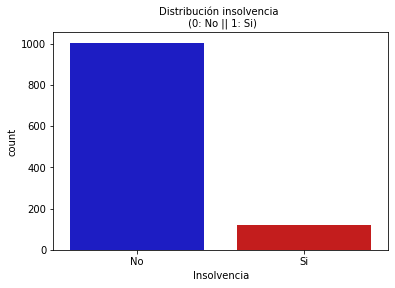

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Insolvencia', data=datos, palette=colors)
plt.title('Distribución insolvencia \n (0: No || 1: Si)', fontsize=10)

Como puede verse en el gráfico, este dataset está desbalanceado lo que supone tener especial cuidado al momento de la partición.

## ETAPA 1: LIMPIEZA Y PREPARACIÓN DE LOS DATOS

## Paso 1.1 - Limpieza de datos

Para inciar se verifica si hay datos faltantes en el dataset 

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 50 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   NIT                                                                   1122 non-null   int64  
 1   Razón social de la sociedad                                           1122 non-null   object 
 2   CIIU                                                                  1122 non-null   object 
 3   Tipo societario                                                       1122 non-null   object 
 4   Departamento de la dirección del domicilio                            1122 non-null   object 
 5   Ingresos de actividades ordinarias                                    1122 non-null   float64
 6   Costo de ventas                                                       1083 non-null   float64
 7

Se puede observar que de las 50 variables del dataset, 14 tienen datos nulos, por lo que es necesario realizar la imputación de los datos. Pero primero, se va a revisar el porcentaje de datos nulos.

In [8]:
nombres = datos.columns

In [9]:
from sklearn.impute import MissingIndicator

In [10]:
import numpy as np

Indicador = MissingIndicator(missing_values = np.nan) 
Indicador.fit(datos) 
Datos_Indicador = Indicador.transform(datos)
display(Datos_Indicador)

array([[False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False],
       [False, False, False, ...,  True, False, False]])

In [11]:
POS = np.where(Datos_Indicador == True) 
print("Porcentaje de Datos Faltantes (%): ", 100*(len(POS[0])/(Datos_Indicador.shape[0]*Datos_Indicador.shape[1])))

Porcentaje de Datos Faltantes (%):  7.795603089720737


Por la naturaleza de los datos no es recomendable utilizar la media para rellenar los datos nulos, por eso se tomó de decisión de poner "0". Tampoco se va a borrar ningún registro en este punto porque supondría una pérdida importante.

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imp = SimpleImputer(missing_values = np.nan, strategy= 'constant', fill_value=0) 
imp.fit(datos) 
Datos_Imputacion = datos.fillna(0)
print(Datos_Imputacion)

            NIT                      Razón social de la sociedad  \
0     830027231                               ROCSA COLOMBIA S.A   
1     830027231                               ROCSA COLOMBIA S.A   
2     800161734  BT LATAM HOLDINGS ( COLOMBIA ) SOCIEDAD ANONIMA   
3     800161734  BT LATAM HOLDINGS ( COLOMBIA ) SOCIEDAD ANONIMA   
4     830004993                        CASA TORO AUTOMOTRIZ S.A.   
...         ...                                              ...   
1117  901291264                         LOGIVECO INVERSIONES SAS   
1118  901291264                         LOGIVECO INVERSIONES SAS   
1119  901315446                                CLIP HOLDING S.A.   
1120  901315446                                CLIP HOLDING S.A.   
1121  901359433                                  PDC HOLDING SAS   

                                                   CIIU  \
0     G4664 - Comercio al por mayor de productos quí...   
1     G4664 - Comercio al por mayor de productos quí...   
2     

In [14]:
Datos_Imputacion = pd.DataFrame(Datos_Imputacion, columns = nombres)
Datos_Imputacion.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 50 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   NIT                                                                   1122 non-null   int64  
 1   Razón social de la sociedad                                           1122 non-null   object 
 2   CIIU                                                                  1122 non-null   object 
 3   Tipo societario                                                       1122 non-null   object 
 4   Departamento de la dirección del domicilio                            1122 non-null   object 
 5   Ingresos de actividades ordinarias                                    1122 non-null   float64
 6   Costo de ventas                                                       1122 non-null   float64
 7

In [15]:
Datos_Imputacion.shape

(1122, 50)

Finalmente, continuaron siendo 1122 filas y 50 columnas sin datos nulos, listas para continuar con los siguientes pasos.

### Paso 1.1.1 - Seleccionar, dar formato y mutar algunas columnas

Primero se eliminan las empresas que estan repetidas




In [16]:
Datos_Imputacion.drop_duplicates()

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,830027231,ROCSA COLOMBIA S.A,G4664 - Comercio al por mayor de productos quí...,01. SOCIEDAD ANÓNIMA,CUNDINAMARCA,158495904.0,126280025.0,32215879.0,0.0,9249894.0,...,0.731429,1.138490,3.955984,0.798224,0.783348,0.216652,146.359114,103.745939,Sin proceso,No
1,830027231,ROCSA COLOMBIA S.A,G4664 - Comercio al por mayor de productos quí...,01. SOCIEDAD ANÓNIMA,CUNDINAMARCA,150805922.0,126113976.0,24691946.0,411486.0,9816075.0,...,0.602151,1.098942,3.669443,0.785842,0.817935,0.182065,147.325933,186.227672,Sin proceso,No
2,800161734,BT LATAM HOLDINGS ( COLOMBIA ) SOCIEDAD ANONIMA,J6110 - Actividades de telecomunicaciones alám...,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,83939493.0,67509189.0,16430304.0,3186576.0,0.0,...,1.567902,2.157875,2.182961,0.685827,0.295566,0.704434,135.706238,41.354103,Sin proceso,No
3,800161734,BT LATAM HOLDINGS ( COLOMBIA ) SOCIEDAD ANONIMA,J6110 - Actividades de telecomunicaciones alám...,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,110235374.0,87826267.0,22409107.0,2925984.0,0.0,...,1.569658,1.507145,1.581176,0.612580,0.422708,0.577292,113.046462,43.761005,Sin proceso,No
4,830004993,CASA TORO AUTOMOTRIZ S.A.,G4511 - Comercio de vehículos automotores nuevos,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,802781725.0,673271503.0,129510222.0,10538872.0,106093455.0,...,0.984517,1.035073,1.087291,0.520910,0.458858,0.541142,33.263411,16.008393,Sin proceso,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,901291264,LOGIVECO INVERSIONES SAS,K6494 - Otras actividades de distribución de f...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,181809705.0,154448960.0,27360745.0,34190065.0,11079501.0,...,0.172159,2.784870,-2.486112,1.672897,0.796406,0.203594,66.215333,40.162359,Reorganización,Si
1118,901291264,LOGIVECO INVERSIONES SAS,K6494 - Otras actividades de distribución de f...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,254938187.0,224953493.0,29984694.0,679603.0,15629308.0,...,0.221619,1.940150,-3.978030,1.335792,0.907230,0.092770,68.181803,73.386698,Liquidación,Si
1119,901315446,CLIP HOLDING S.A.,M7010 - Actividades de administración empresarial,01. SOCIEDAD ANÓNIMA,VALLE,645030.0,154822.0,490208.0,0.0,0.0,...,0.078121,13.639872,0.122222,0.108911,0.908226,0.091774,11.272778,3800.505093,Reorganización,Si
1120,901315446,CLIP HOLDING S.A.,M7010 - Actividades de administración empresarial,01. SOCIEDAD ANÓNIMA,VALLE,418501.0,343781.0,74720.0,0.0,0.0,...,0.109766,13.975363,0.036879,0.035568,0.648359,0.351641,5.101923,1257.404307,Sin proceso,No


# ETAPA 2: EXPLORACIÓN DE LOS DATOS

Ahora se revisan algunas estadísticas

In [17]:
Datos_Imputacion.describe()

,NIT,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,Gastos de administración,Otros gastos,Ganancia por actividades de operación,Costos financieros,...,Capital de trabajo,Indice de insolvencia,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores
count,1.122000e+03,1.122000e+03,1.122000e+03,1.122000e+03,1.122000e+03,1.122000e+03,1.122000e+03,1.122000e+03,1.122000e+03,1.122000e+03,...,1.122000e+03,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,8.616763e+08,5.242936e+08,3.705484e+08,1.537452e+08,1.051769e+07,4.115376e+07,5.878638e+07,2.242028e+07,4.201076e+07,2.442220e+07,...,1.078494e+08,2.130589,1.649190,6.899042,0.917579,0.581981,0.598644,0.401356,204.135318,156.128831
std,3.824487e+07,1.308932e+09,8.701668e+08,5.992774e+08,5.340402e+07,1.285468e+08,2.412756e+08,1.726210e+08,2.438635e+08,8.291433e+07,...,8.373660e+08,3.789661,3.542439,140.011284,39.761929,0.281091,0.262296,0.262296,1340.286618,662.554330
min,8.000020e+08,9.858000e+03,0.000000e+00,-5.198420e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.882268e+09,0.000000e+00,...,-3.332596e+09,0.000916,0.000916,0.012808,-1142.170567,0.000681,0.007153,0.000000,0.000000,0.000000
25%,8.300493e+08,4.645620e+07,2.535446e+07,1.172629e+07,7.072475e+04,0.000000e+00,4.463973e+06,1.259458e+05,1.109956e+06,9.579990e+05,...,1.286308e+06,1.038795,0.665201,0.798939,0.633757,0.418182,0.399469,0.175749,45.610250,40.209630
50%,8.604013e+08,1.584959e+08,1.023108e+08,3.575290e+07,1.276008e+06,5.182410e+06,1.264664e+07,1.162626e+06,9.304533e+06,4.789028e+06,...,1.721535e+07,1.457824,1.036966,1.169795,1.224212,0.568318,0.624005,0.375995,81.383059,64.370487
75%,9.001155e+08,4.369856e+08,3.280306e+08,1.060398e+08,4.917144e+06,2.777837e+07,3.276376e+07,5.870102e+06,3.086199e+07,1.528908e+07,...,5.840407e+07,2.112484,1.634321,1.990942,2.213098,0.721590,0.824251,0.600531,133.065992,103.745939
max,9.013594e+08,1.336426e+10,1.053036e+10,8.677446e+09,1.092899e+09,1.676984e+09,3.605862e+09,2.481872e+09,3.098712e+09,1.184995e+09,...,1.505969e+10,91.053874,89.333099,4630.933880,447.944398,3.593174,1.000000,0.992847,39566.169200,15019.249600


Desde este punto, puede observarse que habrá una gran cantidad de datos atípicos. Una de las razones es que las empresas presentan estados financieros muy variados que corresponden a sus contextos y eso hace que datos como los ingresos, pasivos y activos sean muy diferentes entre sí.





Después, se dividen los datos categóricos y los numéricos

In [18]:
numericas = Datos_Imputacion.select_dtypes(['number']).columns
Datos_Imputacion[numericas].head()

,NIT,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,Gastos de administración,Otros gastos,Ganancia por actividades de operación,Costos financieros,...,Capital de trabajo,Indice de insolvencia,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores
0,830027231,158495904.0,126280025.0,32215879.0,0.0,9249894.0,8742067.0,111381.0,14112537.0,10055536.0,...,18518009,1.121285,0.731429,1.138490,3.955984,0.798224,0.783348,0.216652,146.359114,103.745939
1,830027231,150805922.0,126113976.0,24691946.0,411486.0,9816075.0,8509639.0,195465.0,7055898.0,2745175.0,...,17140482,1.112517,0.602151,1.098942,3.669443,0.785842,0.817935,0.182065,147.325933,186.227672
2,800161734,83939493.0,67509189.0,16430304.0,3186576.0,0.0,15504913.0,277196.0,3834771.0,3064287.0,...,16277264,1.567902,1.567902,2.157875,2.182961,0.685827,0.295566,0.704434,135.706238,41.354103
3,800161734,110235374.0,87826267.0,22409107.0,2925984.0,0.0,13606543.0,316236.0,11412312.0,5259060.0,...,17781605,1.569658,1.569658,1.507145,1.581176,0.612580,0.422708,0.577292,113.046462,43.761005
4,830004993,802781725.0,673271503.0,129510222.0,10538872.0,106093455.0,8247511.0,0.0,25708128.0,19649071.0,...,162827727,2.105476,0.984517,1.035073,1.087291,0.520910,0.458858,0.541142,33.263411,16.008393


In [19]:
categoricas = Datos_Imputacion.select_dtypes(['object']).columns
Datos_Imputacion[categoricas].head()

,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Proceso,Insolvencia
0,ROCSA COLOMBIA S.A,G4664 - Comercio al por mayor de productos quí...,01. SOCIEDAD ANÓNIMA,CUNDINAMARCA,Sin proceso,No
1,ROCSA COLOMBIA S.A,G4664 - Comercio al por mayor de productos quí...,01. SOCIEDAD ANÓNIMA,CUNDINAMARCA,Sin proceso,No
2,BT LATAM HOLDINGS ( COLOMBIA ) SOCIEDAD ANONIMA,J6110 - Actividades de telecomunicaciones alám...,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,Sin proceso,No
3,BT LATAM HOLDINGS ( COLOMBIA ) SOCIEDAD ANONIMA,J6110 - Actividades de telecomunicaciones alám...,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,Sin proceso,No
4,CASA TORO AUTOMOTRIZ S.A.,G4511 - Comercio de vehículos automotores nuevos,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,Sin proceso,No


A continuación se hace un análisis de las variables catégocias con respecto a la insolvencia

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

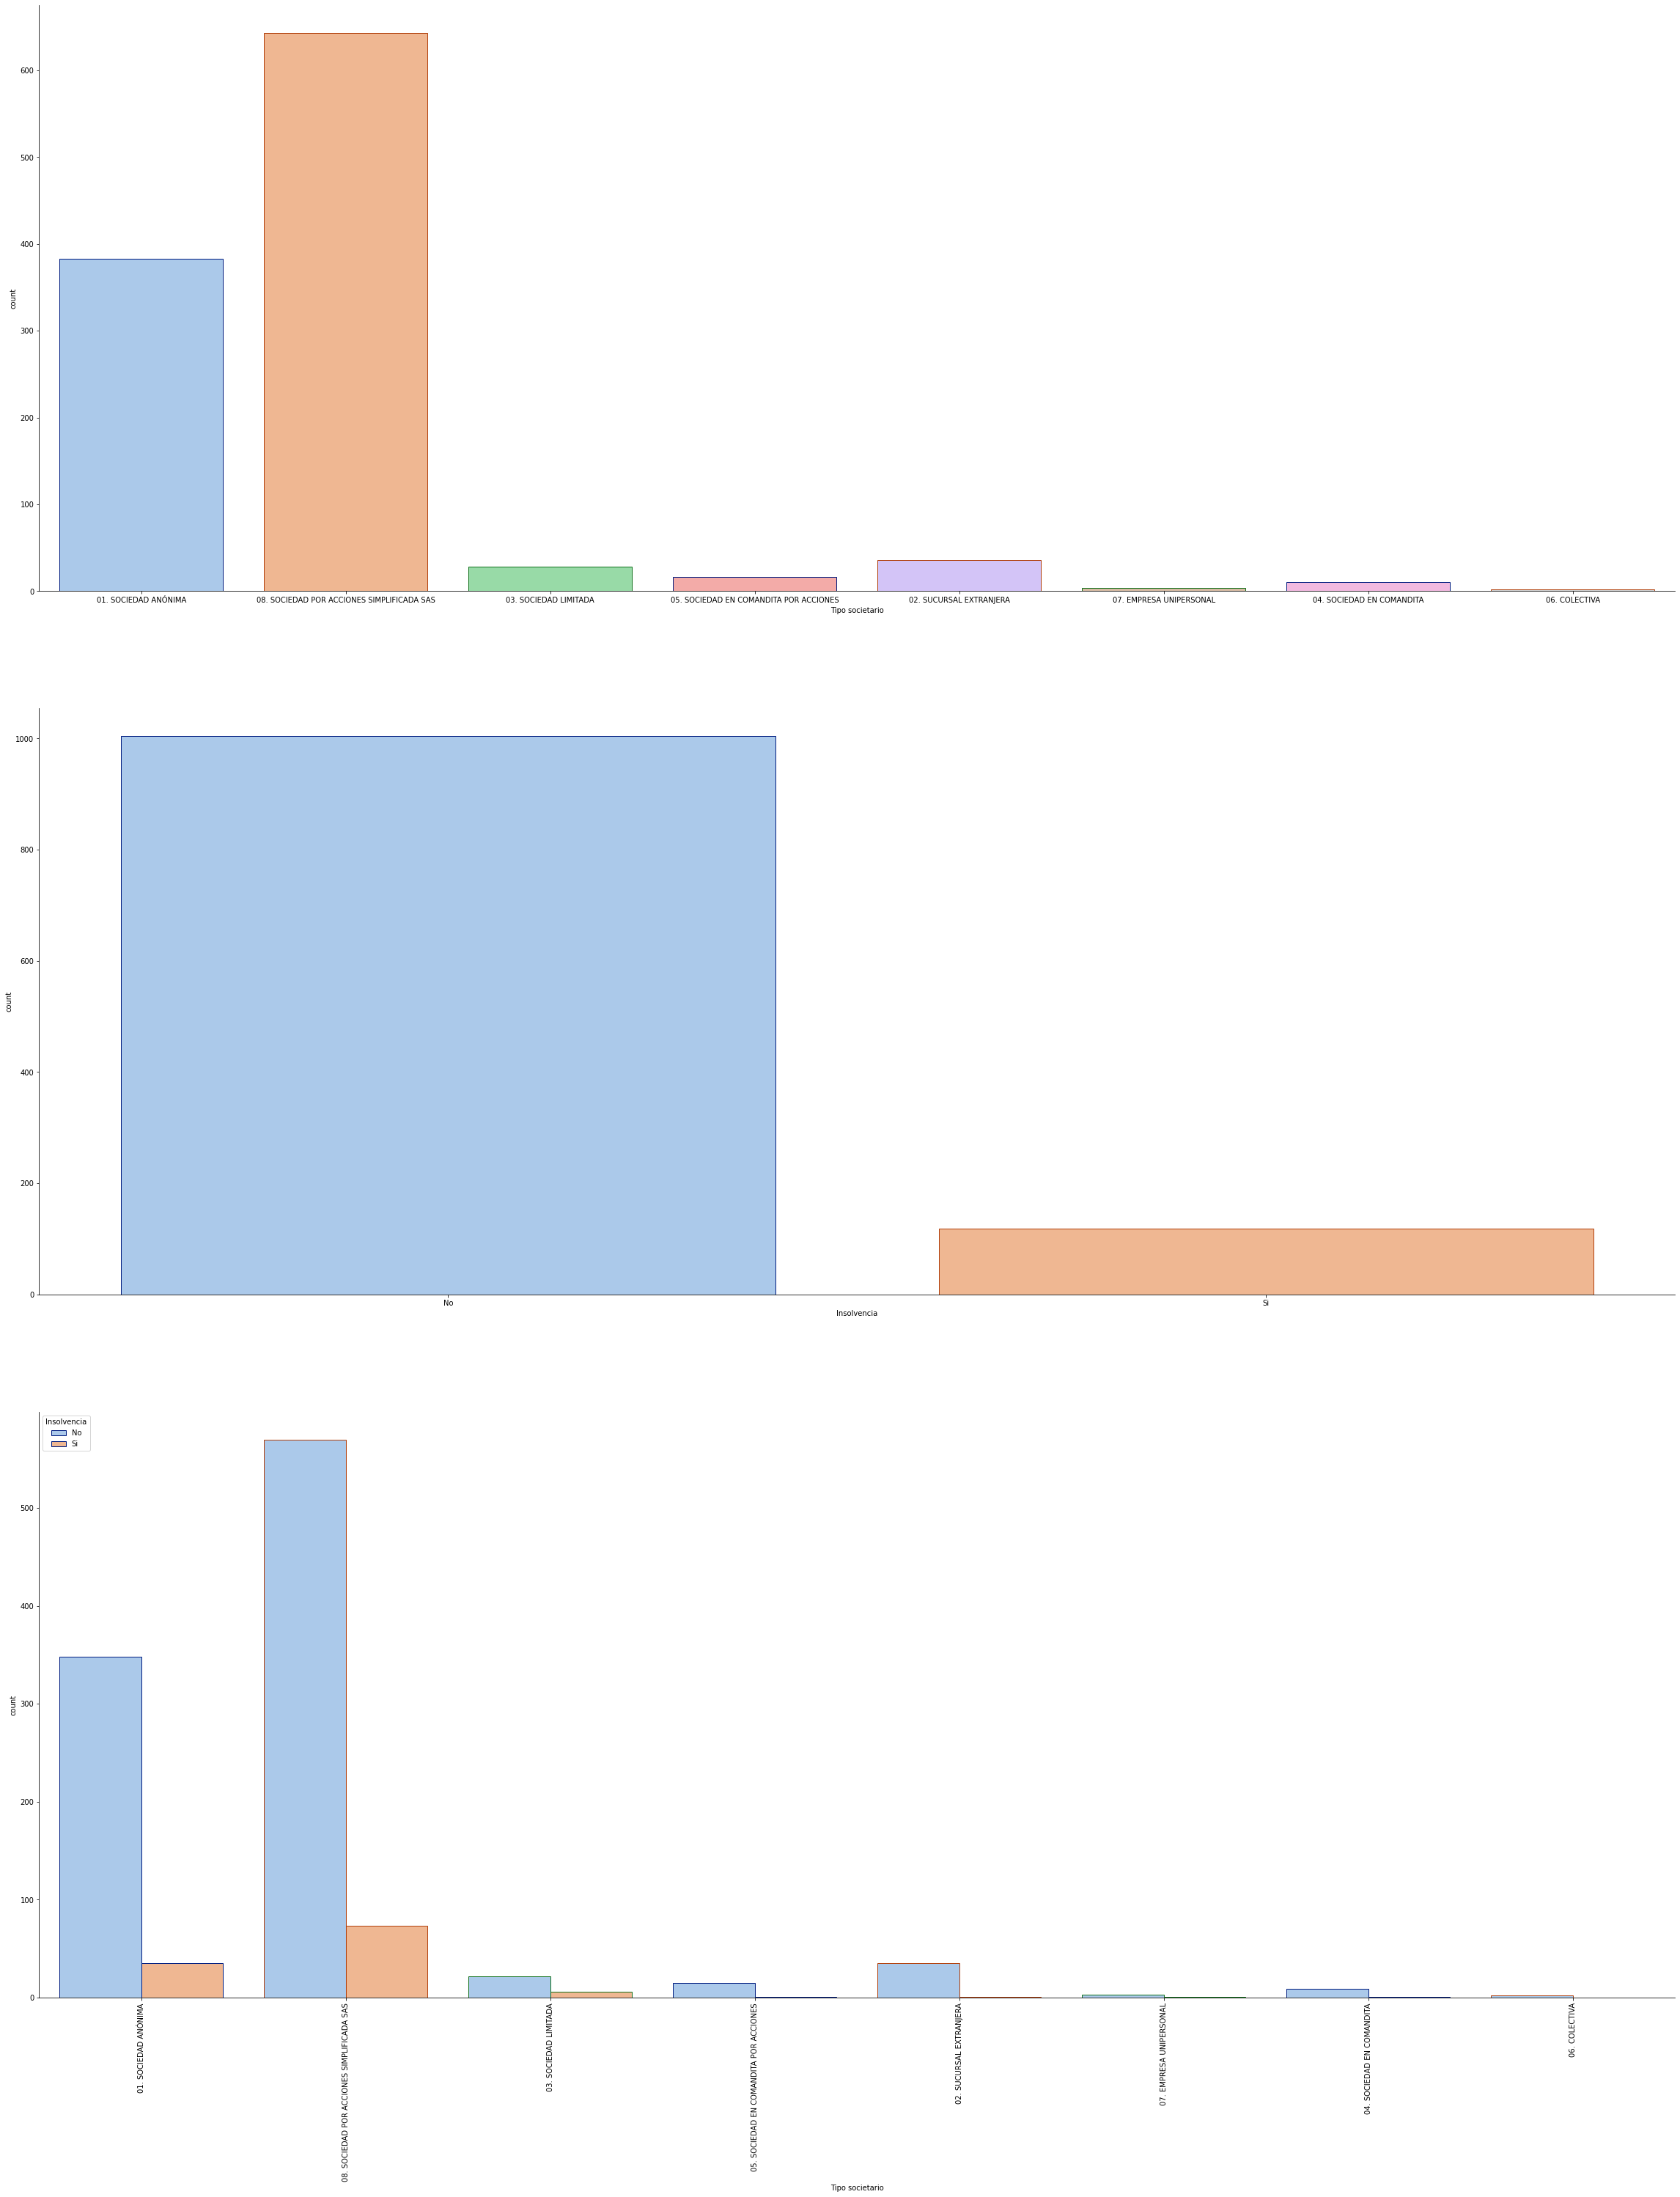

In [20]:
df_CIIU= Datos_Imputacion.loc[:,["Tipo societario","Insolvencia"]]
fig,ax= plt.subplots(3,1,figsize=(40,50))
sns.countplot(x=df_CIIU['Tipo societario'],palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3),ax=ax[0])
sns.despine()
sns.countplot(x=df_CIIU.Insolvencia,palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3),ax=ax[1])
sns.despine()
sns.countplot(data=Datos_Imputacion,x="Tipo societario",hue="Insolvencia",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3),ax=ax[2])
sns.despine()
plt.xticks(rotation=90)

Se observa que los tipos de sociedades que cuentan con más empresas, son las que más presentan Insolvencia. Asimismo, llama la atención que las sociedades colectivas tengan más empresas que presenten Insolvencia que sin insolvencia.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

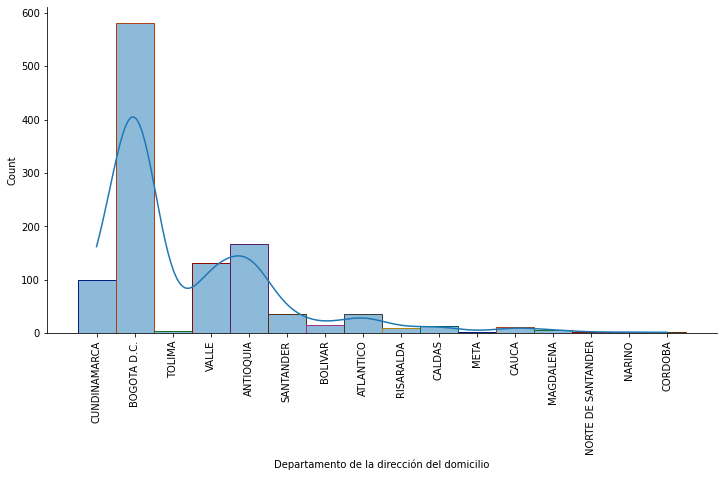

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(x=Datos_Imputacion['Departamento de la dirección del domicilio'],palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark"),kde=True)
sns.despine()
plt.xticks(rotation=90)

Se evidencia que la mayoría de las empresas tomadas se encuentran en os departamentos con mayor cantidad de habitantes.

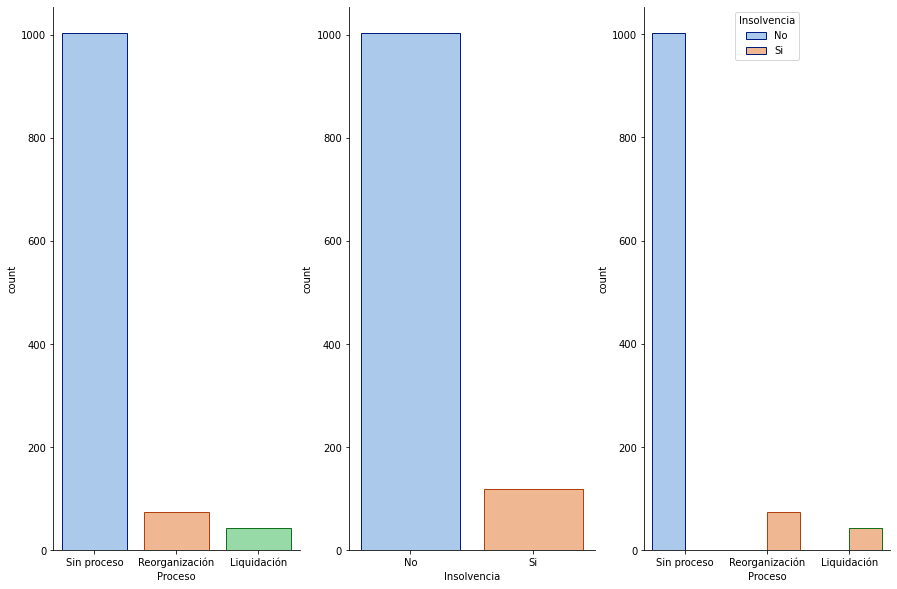

In [22]:
df_Proceso= Datos_Imputacion.loc[:,["Proceso","Insolvencia"]]
fig,ax= plt.subplots(1,3,figsize=(15,10))
sns.countplot(x=df_Proceso['Proceso'],palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3),ax=ax[0])
sns.despine()
sns.countplot(x=df_Proceso.Insolvencia,palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3),ax=ax[1])
sns.despine()
sns.countplot(data=Datos_Imputacion,x="Proceso",hue="Insolvencia",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3),ax=ax[2])
sns.despine()

Como se puede observar en las gráficas las empresas que están en reorganización o en liquidación son las que se encuentran en insolvencia.

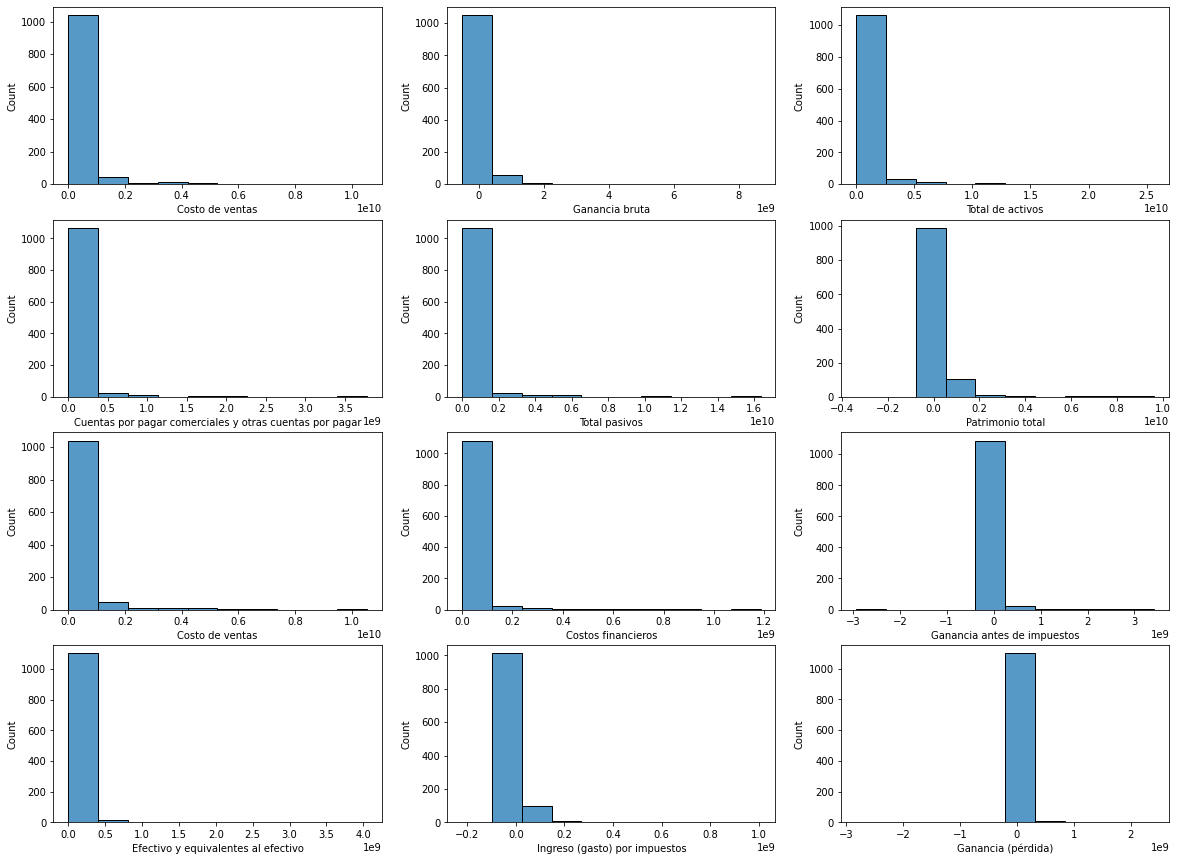

In [23]:
fig, ax = plt.subplots(figsize=(20,15))
plt.subplot(4,3,1)
sns.histplot(Datos_Imputacion['Costo de ventas'],bins=10)
plt.subplot(4,3,2)
sns.histplot(Datos_Imputacion['Ganancia bruta'],bins=10)
plt.subplot(4,3,3)
sns.histplot(Datos_Imputacion['Total de activos'],bins=10)
plt.subplot(4,3,4)
sns.histplot(Datos_Imputacion['Cuentas por pagar comerciales y otras cuentas por pagar'],bins=10)
plt.subplot(4,3,5)
sns.histplot(Datos_Imputacion['Total pasivos'],bins=10)
plt.subplot(4,3,6)
sns.histplot(Datos_Imputacion['Patrimonio total'],bins=10)	
plt.subplot(4,3,7)
sns.histplot(Datos_Imputacion['Costo de ventas'],bins=10)
plt.subplot(4,3,8)
sns.histplot(Datos_Imputacion['Costos financieros'],bins=10)
plt.subplot(4,3,9)
sns.histplot(Datos_Imputacion['Ganancia antes de impuestos'],bins=10)	
plt.subplot(4,3,10)
sns.histplot(Datos_Imputacion['Efectivo y equivalentes al efectivo'],bins=10)
plt.subplot(4,3,11)
sns.histplot(Datos_Imputacion['Ingreso (gasto) por impuestos'],bins=10)
plt.subplot(4,3,12)
sns.histplot(Datos_Imputacion['Ganancia (pérdida)'],bins=10)

Ahora se revisa la relación de la insolvencia con los indicadores financieros 

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


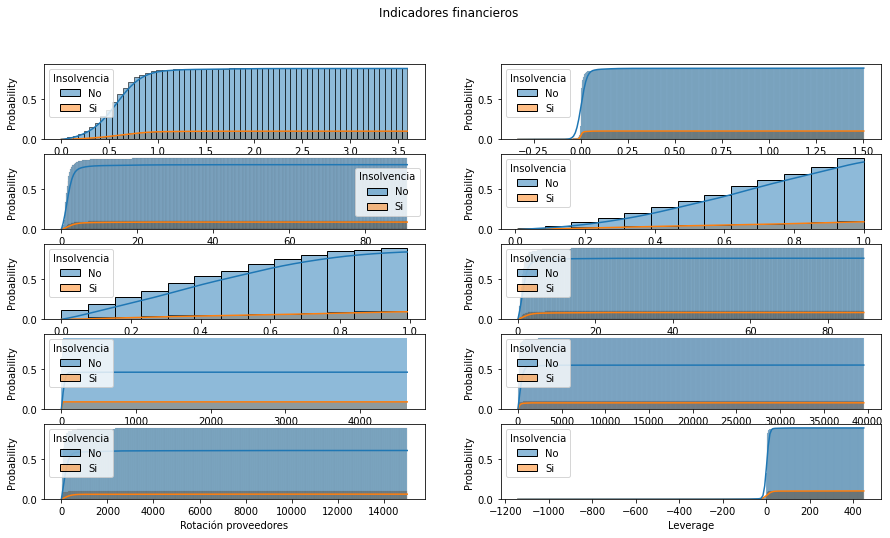

In [24]:
_, ax1 = plt.subplots(5, 2, figsize=(15,8))
plt.suptitle('Indicadores financieros')

for i, u in enumerate(['Capital de trabajo', 'Indice de insolvencia', 'Prueba ácida',
       'Liquidez general', 'Leverage', 'Endeudamiento sobre activos',
       'Concentración endeudamiento corto plazo',
       'Concentración endeudamiento largo plazo', 'Rotación de cartera',
       'Rotación proveedores']):
   
    sns.histplot(x=u, hue='Insolvencia', data=Datos_Imputacion, kde=True, ax=ax1[i%5, int(not i%2)],
                stat="probability", cumulative=True)
plt.show()

Con respecto a algunas variables númericas puede observarse que en algunos indicadores financieros como el Leverage hay una relación directamente entre la insolvencia y un resultado mayor en este indicador.

# 3. PREPROCESSING

Una de las cosas más importantes para que corran los modelos es poder trabajar con variables numéricas, por eso se transforman las categóricas a variables dummis.

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Datos_Imputacion[categoricas] = Datos_Imputacion[categoricas].apply(encoder.fit_transform)
Datos_Imputacion[categoricas]

,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Proceso,Insolvencia
0,477,102,0,7,2,0
1,477,102,0,7,2,0
2,77,129,0,2,2,0
3,77,129,0,2,2,0
4,94,86,0,2,2,0
...,...,...,...,...,...,...
1117,364,139,7,2,1,1
1118,364,139,7,2,0,1
1119,115,147,0,15,1,1
1120,115,147,0,15,2,0


In [26]:
Datos_Imputacion

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,830027231,477,102,0,7,158495904.0,126280025.0,32215879.0,0.0,9249894.0,...,0.731429,1.138490,3.955984,0.798224,0.783348,0.216652,146.359114,103.745939,2,0
1,830027231,477,102,0,7,150805922.0,126113976.0,24691946.0,411486.0,9816075.0,...,0.602151,1.098942,3.669443,0.785842,0.817935,0.182065,147.325933,186.227672,2,0
2,800161734,77,129,0,2,83939493.0,67509189.0,16430304.0,3186576.0,0.0,...,1.567902,2.157875,2.182961,0.685827,0.295566,0.704434,135.706238,41.354103,2,0
3,800161734,77,129,0,2,110235374.0,87826267.0,22409107.0,2925984.0,0.0,...,1.569658,1.507145,1.581176,0.612580,0.422708,0.577292,113.046462,43.761005,2,0
4,830004993,94,86,0,2,802781725.0,673271503.0,129510222.0,10538872.0,106093455.0,...,0.984517,1.035073,1.087291,0.520910,0.458858,0.541142,33.263411,16.008393,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,901291264,364,139,7,2,181809705.0,154448960.0,27360745.0,34190065.0,11079501.0,...,0.172159,2.784870,-2.486112,1.672897,0.796406,0.203594,66.215333,40.162359,1,1
1118,901291264,364,139,7,2,254938187.0,224953493.0,29984694.0,679603.0,15629308.0,...,0.221619,1.940150,-3.978030,1.335792,0.907230,0.092770,68.181803,73.386698,0,1
1119,901315446,115,147,0,15,645030.0,154822.0,490208.0,0.0,0.0,...,0.078121,13.639872,0.122222,0.108911,0.908226,0.091774,11.272778,3800.505093,1,1
1120,901315446,115,147,0,15,418501.0,343781.0,74720.0,0.0,0.0,...,0.109766,13.975363,0.036879,0.035568,0.648359,0.351641,5.101923,1257.404307,2,0


Una vez todos los datos están con valores numericos, se revisan los datos atípicos. Como siempre se supo que hay bastantes outliers se optó por usar la función LOF.

In [31]:
from sklearn.neighbors import LocalOutlierFactor # detección de outlers no supervisado basado en LOF
from matplotlib import pyplot

LOF = LocalOutlierFactor(n_neighbors = 7, algorithm = 'auto', metric = 'euclidean') 
Filtrado = LOF.fit_predict(Datos_Imputacion)  
NOF = LOF.negative_outlier_factor_

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(Datos_Imputacion), dtype = int) # Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [32]:
print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de muestras o filas con datos atípicos: ", n_errors)

Detección:  [1 1 1 ... 1 1 1]
Factores atípicos negativos:  [-0.98794757 -0.98168738 -1.09140073 ... -1.01023736 -1.02902731
 -1.22268952]
Número de muestras o filas con datos atípicos:  90


Debido a que los datos atípicos realmente son muy distantes, se decidió eliminarlos.

In [33]:
pos = np.where(Filtrado == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_LOF = Datos_Imputacion.loc[pos, :]
print("Número de muestras sin outilers:", datos_sin_outilers_LOF.shape[0])
display(datos_sin_outilers_LOF)

Número de muestras sin outilers: 1032


,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,830027231,477,102,0,7,158495904.0,126280025.0,32215879.0,0.0,9249894.0,...,0.731429,1.138490,3.955984,0.798224,0.783348,0.216652,146.359114,103.745939,2,0
1,830027231,477,102,0,7,150805922.0,126113976.0,24691946.0,411486.0,9816075.0,...,0.602151,1.098942,3.669443,0.785842,0.817935,0.182065,147.325933,186.227672,2,0
2,800161734,77,129,0,2,83939493.0,67509189.0,16430304.0,3186576.0,0.0,...,1.567902,2.157875,2.182961,0.685827,0.295566,0.704434,135.706238,41.354103,2,0
3,800161734,77,129,0,2,110235374.0,87826267.0,22409107.0,2925984.0,0.0,...,1.569658,1.507145,1.581176,0.612580,0.422708,0.577292,113.046462,43.761005,2,0
4,830004993,94,86,0,2,802781725.0,673271503.0,129510222.0,10538872.0,106093455.0,...,0.984517,1.035073,1.087291,0.520910,0.458858,0.541142,33.263411,16.008393,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,901273886,557,141,7,7,280639483.0,221227094.0,59412389.0,919076.0,19705983.0,...,3.106598,0.300273,0.094225,0.086111,0.934794,0.065206,45.324879,59.880946,2,0
1116,901273886,557,141,7,7,188029823.0,144689172.0,43340651.0,715704.0,13923925.0,...,2.302617,0.549690,0.231096,0.187716,0.664209,0.335791,72.580399,147.537806,2,0
1119,901315446,115,147,0,15,645030.0,154822.0,490208.0,0.0,0.0,...,0.078121,13.639872,0.122222,0.108911,0.908226,0.091774,11.272778,3800.505093,1,1
1120,901315446,115,147,0,15,418501.0,343781.0,74720.0,0.0,0.0,...,0.109766,13.975363,0.036879,0.035568,0.648359,0.351641,5.101923,1257.404307,2,0


In [34]:
print(Datos_Imputacion.shape)
print(datos_sin_outilers_LOF.shape)

(1122, 50)
(1032, 50)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

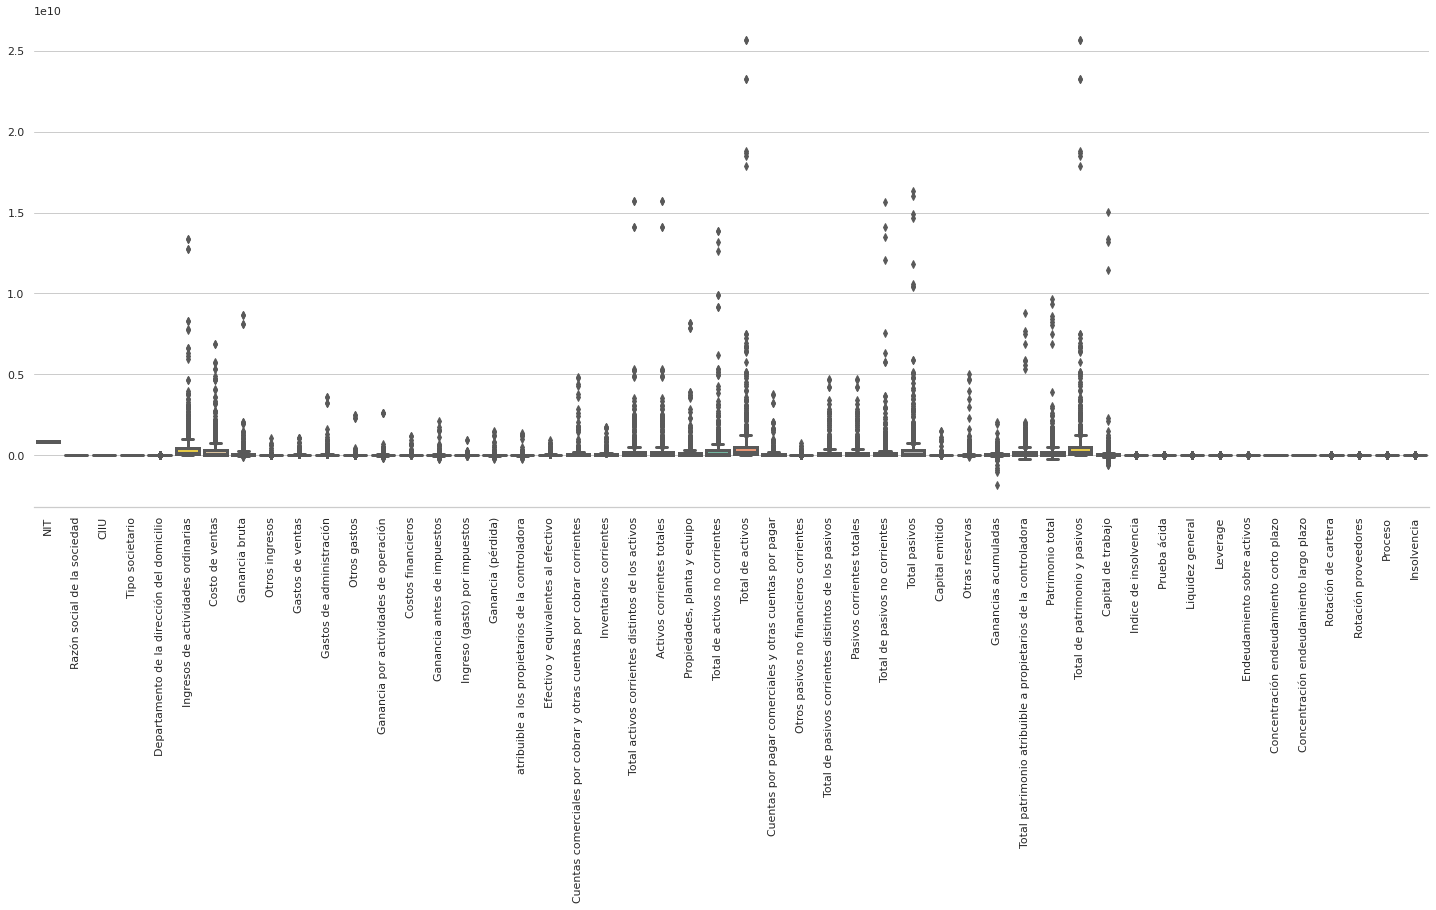

In [35]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = datos_sin_outilers_LOF, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)
plt.xticks(rotation=90)

Acá puede verse la gran cantidad de outliers del dataset y la gran distancia que hay entre algunos de ellos

In [36]:
# Calculando los cuartiles
datos_sin_outilers_LOF.quantile([0, 0.25, 0.5, 0.75, 1])

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0.00,800002030.0,0.00,0.0,0.0,0.0,9.858000e+03,0.000000e+00,-1.284192e+08,0.000000e+00,0.000000e+00,...,0.000916,0.012808,-1142.170567,0.000681,0.007153,0.000000,0.000000,0.000000,0.0,0.0
0.25,830043084.0,144.75,54.0,0.0,2.0,4.504070e+07,2.615059e+07,1.201315e+07,7.566700e+04,0.000000e+00,...,0.674110,0.797907,0.667513,0.419307,0.406408,0.173312,46.217889,40.097188,2.0,0.0
0.50,860401339.0,286.50,92.0,7.0,2.0,1.569522e+08,1.029361e+08,3.575290e+07,1.266604e+06,5.678687e+06,...,1.039120,1.155530,1.241043,0.566952,0.626972,0.373028,80.215299,63.785558,2.0,0.0
0.75,900087151.0,424.25,140.0,7.0,7.0,4.371797e+08,3.244428e+08,1.029690e+08,4.648433e+06,2.841357e+07,...,1.618409,1.919952,2.206231,0.710627,0.826688,0.593592,128.939141,100.064128,2.0,0.0
1.00,901359433.0,563.00,164.0,7.0,15.0,1.336426e+10,6.872073e+09,8.677446e+09,1.092899e+09,1.076722e+09,...,89.333099,4630.933880,216.996617,2.254892,1.000000,0.992847,39566.169200,8472.739488,2.0,1.0


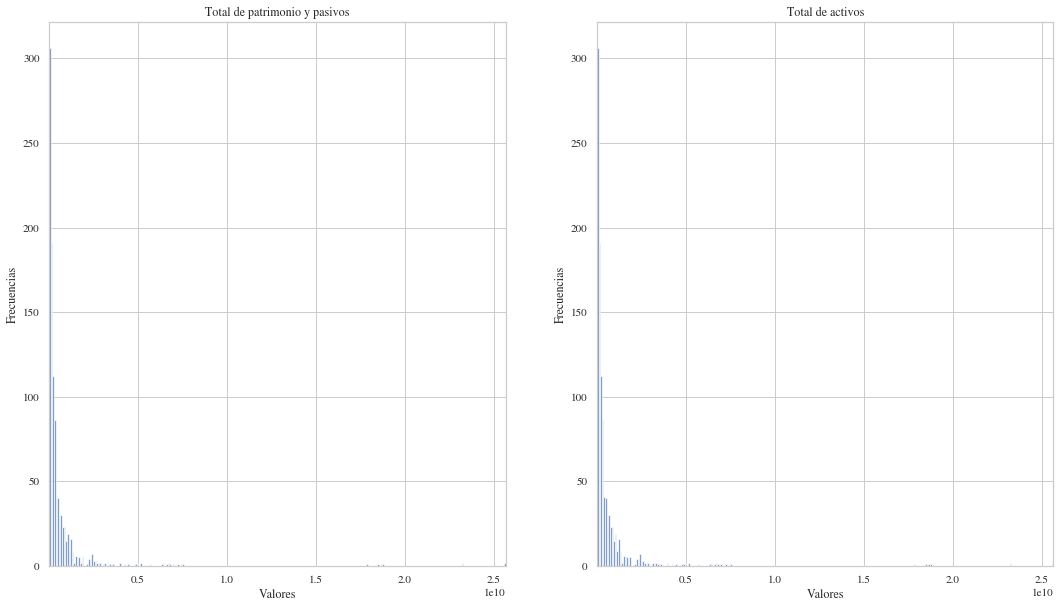

In [37]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(datos_sin_outilers_LOF['Total de patrimonio y pasivos'], bins = 'fd', alpha = 0.7) # fd = regla de Freedman-Diaconis
                                                                     # alpha es el ancho de las particiones
pyplot.xlim(datos_sin_outilers_LOF['Total de patrimonio y pasivos'].min(), datos_sin_outilers_LOF['Total de patrimonio y pasivos'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Total de patrimonio y pasivos')

ax = fig.add_subplot(1, 2, 2)
pyplot.hist(datos_sin_outilers_LOF['Total de activos'], bins = 'fd', alpha = 0.7) # fd = regla de Freedman-Diaconis
pyplot.xlim(datos_sin_outilers_LOF['Total de activos'].min(), datos_sin_outilers_LOF['Total de activos'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Total de activos')
pyplot.show()

In [38]:
q1, q3 = np.percentile(datos_sin_outilers_LOF,[25,75]) # Calculo de percentiles del primer y tercer cuartil de los datos llamado df
iqr = q3 - q1 # Diferencia entre percentiles
Frontera_baja = q1 - (1.5 * iqr) 
Frontera_alta = q3 + (1.5 * iqr)
print("La Frontera baja es {:.2f}".format(Frontera_baja))
print("La Frontera alta es {:.2f}".format(Frontera_alta))

La Frontera baja es -86054404.87
La Frontera alta es 143424014.92


In [39]:
from pandas.api.types import is_numeric_dtype

In [40]:
def remove_outlier(datos, per_bajo, per_alto):
    quant_datos = datos.quantile([per_bajo, per_alto]) # Calculo del primer y tercer cuartil
    for name in list(datos.columns):
        if is_numeric_dtype(df[name]):
            datos = datos[(datos[name] > quant_datos.loc[per_bajo, name]) & (datos[name] < quant_datos.loc[per_alto, name])]
    return datos

In [41]:
df = datos_sin_outilers_LOF # Almacenamos la base de datos en una variable df
Datos_sin_outliers_Primer_Tercer_Cuartil = remove_outlier(pd.DataFrame(df), 0.25, 0.75) 
display(Datos_sin_outliers_Primer_Tercer_Cuartil)

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia


Luego de la disminución de los datos atípicos, se comienza con el escalamiento de los datos

In [42]:
from sklearn.preprocessing import RobustScaler # Escalamiento robusto

RS_1 = RobustScaler(quantile_range = (15, 75)) # (Primer cuartil, tercer cuartil)
RS_2 = RobustScaler(quantile_range = (20, 65))
RS_3 = RobustScaler(quantile_range = (30, 60))

Datos_RS_1 = RS_1.fit_transform(df)
Datos_RS_2 = RS_2.fit_transform(df)
Datos_RS_3 = RS_3.fit_transform(df)

In [43]:
Datos_RS_1 = pd.DataFrame(data = Datos_RS_1, columns = nombres)
Datos_RS_2 = pd.DataFrame(data = Datos_RS_2, columns = nombres)
Datos_RS_3 = pd.DataFrame(data = Datos_RS_3, columns = nombres)

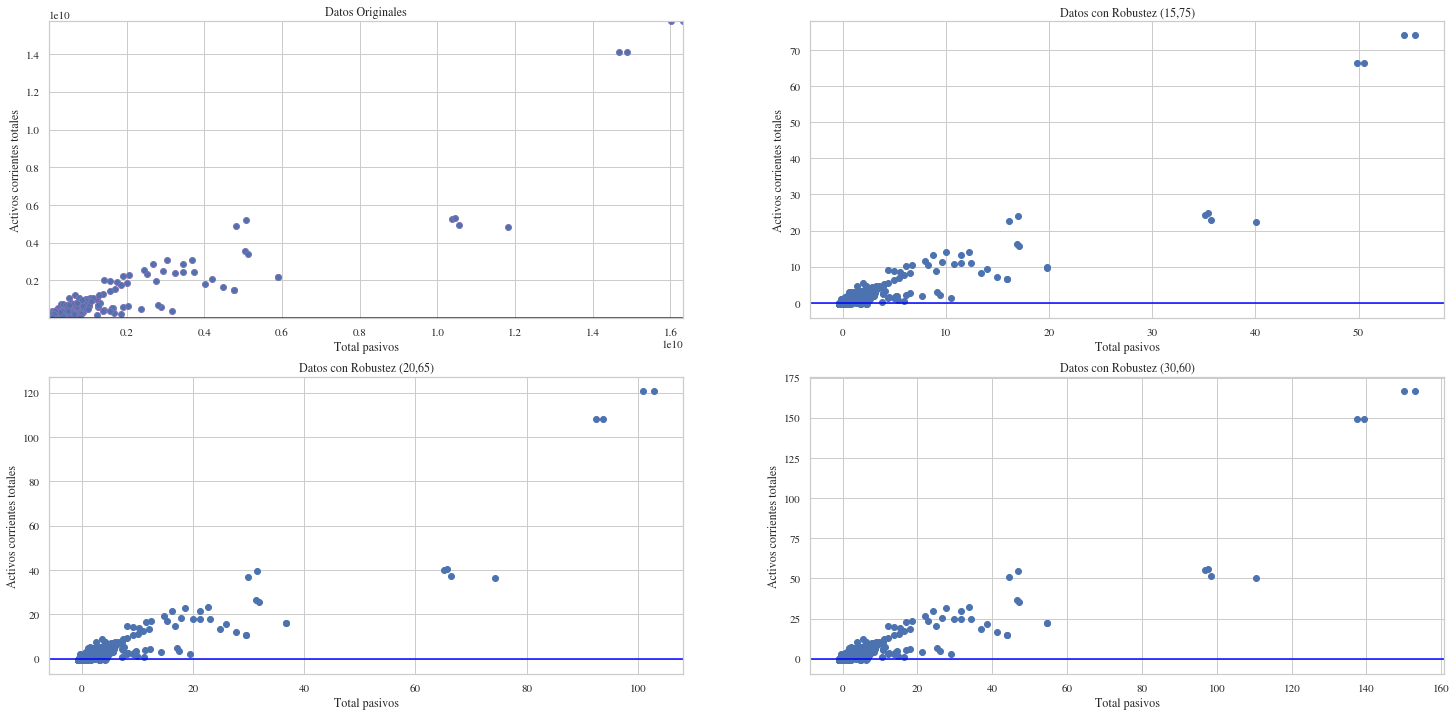

In [44]:
fig = pyplot.figure(figsize=(25,12))

ax = fig.add_subplot(2, 2, 1)   
ax.scatter(df['Total pasivos'], df['Activos corrientes totales'], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(df['Total pasivos'].min(),df['Total pasivos'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(df['Activos corrientes totales'].min(),df['Activos corrientes totales'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Total pasivos') # Etiqueta del eje x
pyplot.ylabel('Activos corrientes totales') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 2) 
ax.scatter(Datos_RS_1['Total pasivos'], Datos_RS_1['Activos corrientes totales'], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Robustez (15,75)') # Titulo de la gráfica
pyplot.xlabel('Total pasivos') # Etiqueta del eje x
pyplot.ylabel('Activos corrientes totales') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 3) 
ax.scatter(Datos_RS_2['Total pasivos'], Datos_RS_2['Activos corrientes totales'], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Robustez (20,65)') # Titulo de la gráfica
pyplot.xlabel('Total pasivos') # Etiqueta del eje x
pyplot.ylabel('Activos corrientes totales') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 4) 
ax.scatter(Datos_RS_3['Total pasivos'], Datos_RS_3['Activos corrientes totales'], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Robustez (30,60)') # Titulo de la gráfica
pyplot.xlabel('Total pasivos') # Etiqueta del eje x
pyplot.ylabel('Activos corrientes totales') # Etiqueta del eje y

pyplot.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

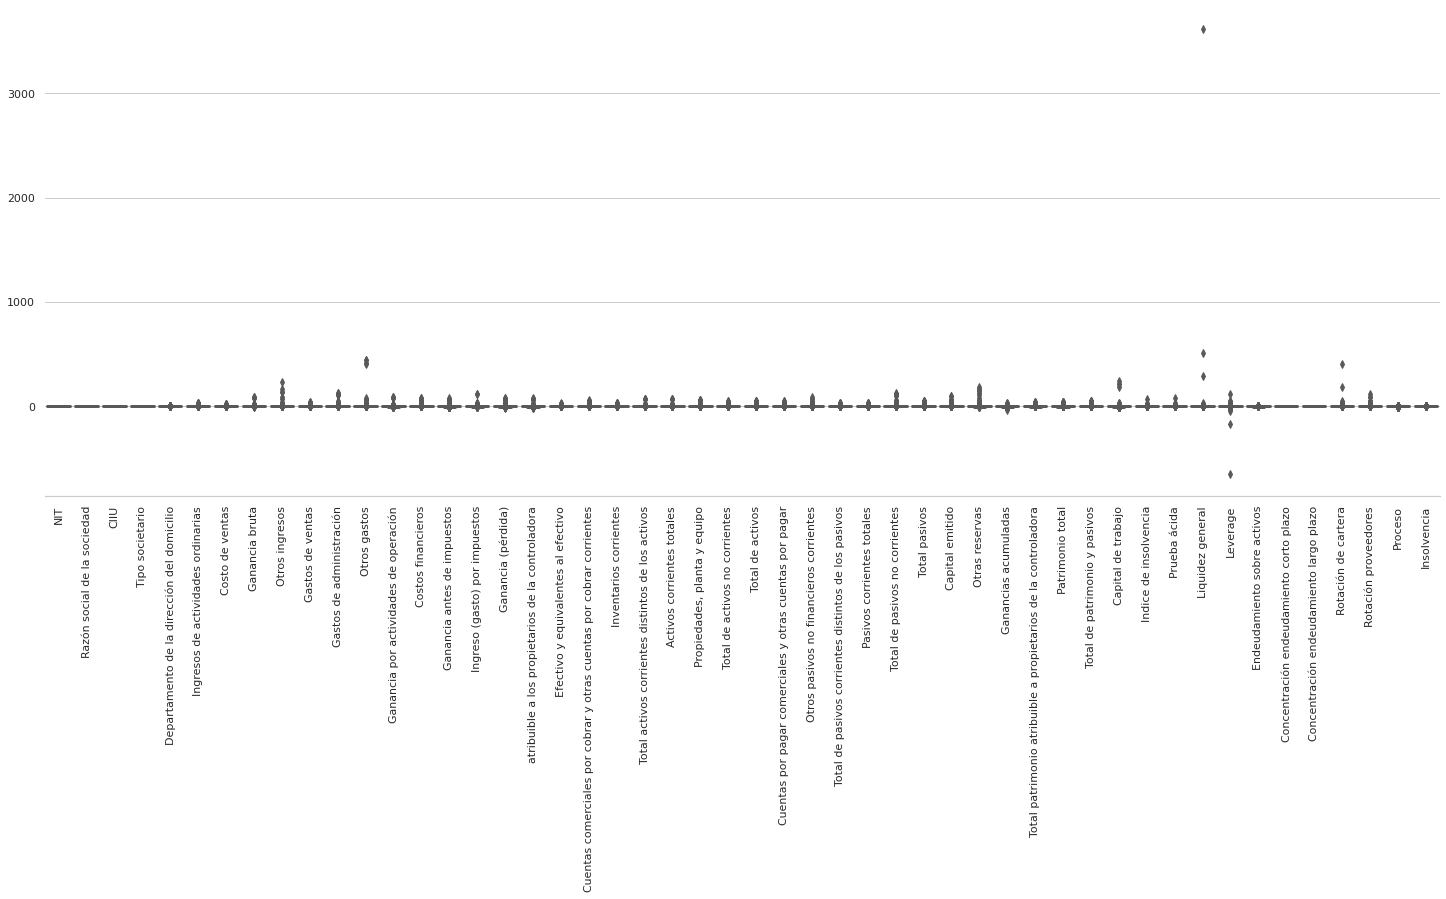

In [45]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Datos_RS_1, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con escalamiento robusto (15, 75)
sns.despine(left=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

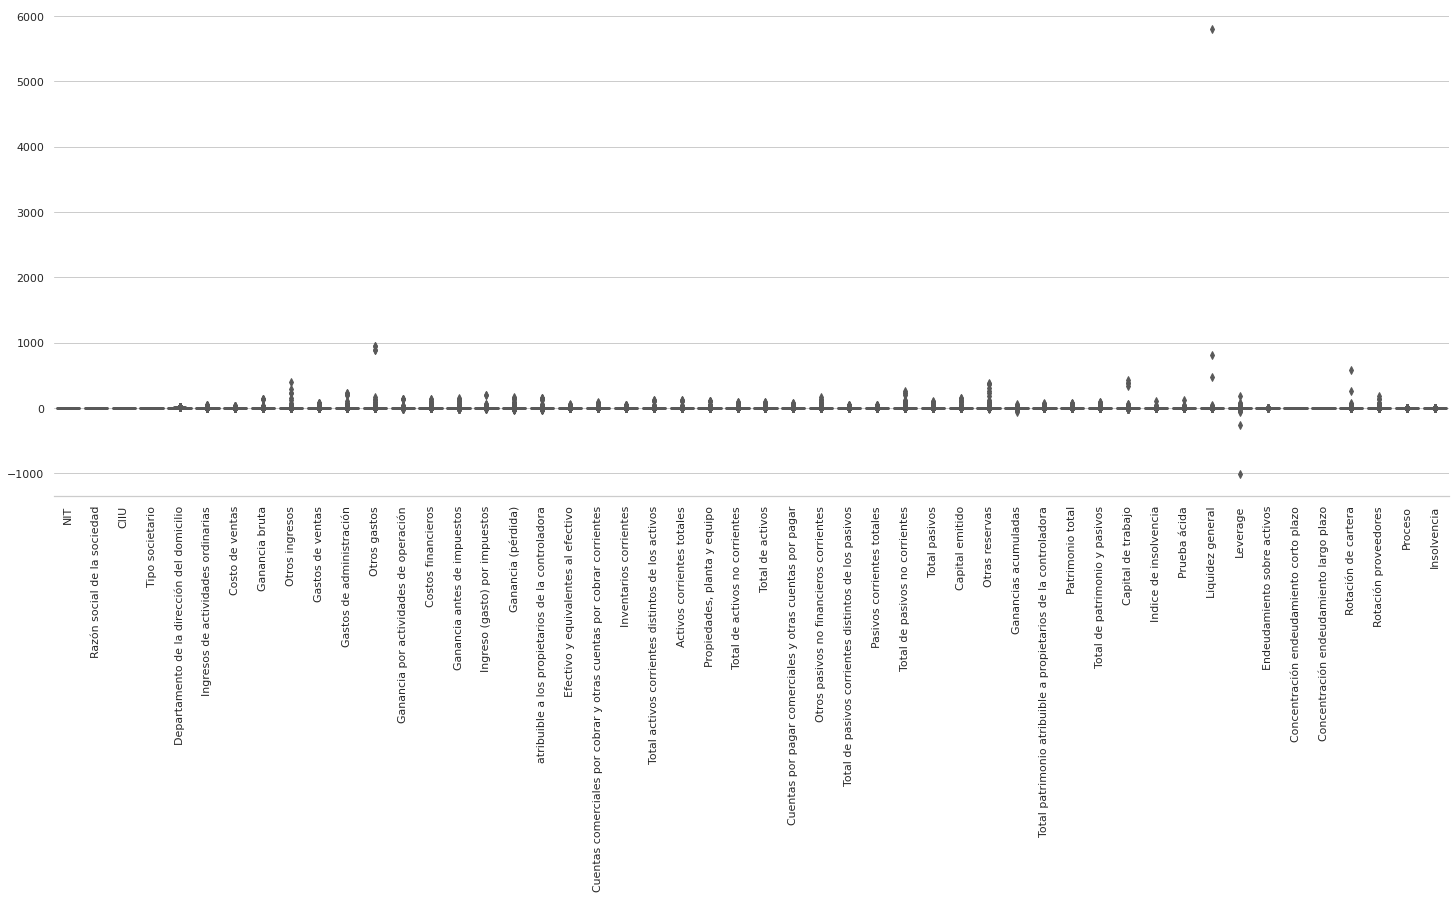

In [46]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Datos_RS_2, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con escalamiento robusto (20, 65)
sns.despine(left=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

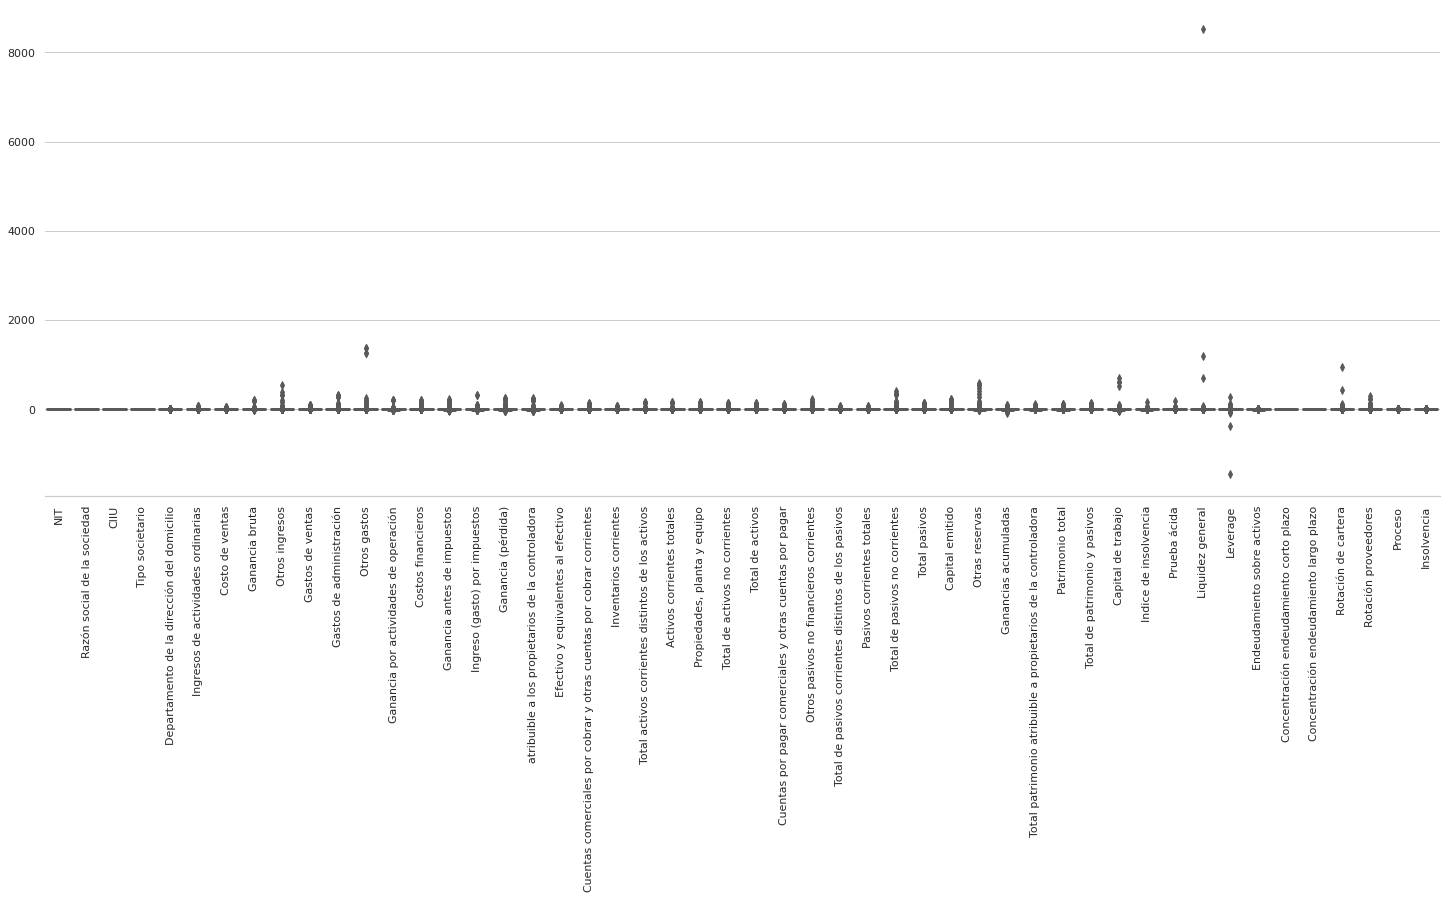

In [47]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Datos_RS_3, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con escalamiento robusto (30, 60)
sns.despine(left=True)
plt.xticks(rotation=90)

En los gráficos se puede ver por cuartiles el escalamiento a través de la tecnica robusta. Como su resultado no es muy distinto al de un escalamiento siemple, no se tiene en cuenta para este ejercicio.

In [48]:
Datos1 = np.vstack([df.T,df['Insolvencia']]).T
Datos1 = pd.DataFrame(df, columns = datos.columns)
Datos1

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,830027231,477,102,0,7,158495904.0,126280025.0,32215879.0,0.0,9249894.0,...,0.731429,1.138490,3.955984,0.798224,0.783348,0.216652,146.359114,103.745939,2,0
1,830027231,477,102,0,7,150805922.0,126113976.0,24691946.0,411486.0,9816075.0,...,0.602151,1.098942,3.669443,0.785842,0.817935,0.182065,147.325933,186.227672,2,0
2,800161734,77,129,0,2,83939493.0,67509189.0,16430304.0,3186576.0,0.0,...,1.567902,2.157875,2.182961,0.685827,0.295566,0.704434,135.706238,41.354103,2,0
3,800161734,77,129,0,2,110235374.0,87826267.0,22409107.0,2925984.0,0.0,...,1.569658,1.507145,1.581176,0.612580,0.422708,0.577292,113.046462,43.761005,2,0
4,830004993,94,86,0,2,802781725.0,673271503.0,129510222.0,10538872.0,106093455.0,...,0.984517,1.035073,1.087291,0.520910,0.458858,0.541142,33.263411,16.008393,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,901273886,557,141,7,7,280639483.0,221227094.0,59412389.0,919076.0,19705983.0,...,3.106598,0.300273,0.094225,0.086111,0.934794,0.065206,45.324879,59.880946,2,0
1116,901273886,557,141,7,7,188029823.0,144689172.0,43340651.0,715704.0,13923925.0,...,2.302617,0.549690,0.231096,0.187716,0.664209,0.335791,72.580399,147.537806,2,0
1119,901315446,115,147,0,15,645030.0,154822.0,490208.0,0.0,0.0,...,0.078121,13.639872,0.122222,0.108911,0.908226,0.091774,11.272778,3800.505093,1,1
1120,901315446,115,147,0,15,418501.0,343781.0,74720.0,0.0,0.0,...,0.109766,13.975363,0.036879,0.035568,0.648359,0.351641,5.101923,1257.404307,2,0


In [49]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Datos_Escalados_Estandar = SS.fit_transform(Datos1) 
print(Datos_Escalados_Estandar)

[[-0.83399388  1.18558817  0.22995068 ... -0.0663775   0.31708782
  -0.3383354 ]
 [-0.83399388  1.18558817  0.22995068 ...  0.10787464  0.31708782
  -0.3383354 ]
 [-1.61809863 -1.28229474  0.81718795 ... -0.19818742  0.31708782
  -0.3383354 ]
 ...
 [ 1.03764508 -1.04784587  1.20867946 ...  7.74345076 -1.93970274
   2.95564698]
 [ 1.03764508 -1.04784587  1.20867946 ...  2.37085829  0.31708782
  -0.3383354 ]
 [ 1.03879994  0.87710281 -1.35776488 ... -0.11735416  0.31708782
  -0.3383354 ]]


Se aplica el escalamiento estandar

In [50]:
Datos_Escalados_Estandar = pd.DataFrame(Datos_Escalados_Estandar, columns = nombres)
Datos_Escalados_Estandar 

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,-0.833994,1.185588,0.229951,-1.242511,0.531137,-0.279701,-0.294426,-0.191401,-0.180755,-0.276731,...,-0.248074,-0.041840,0.083491,0.934552,0.699825,-0.699825,-0.037533,-0.066377,0.317088,-0.338335
1,-0.833994,1.185588,0.229951,-1.242511,0.531137,-0.286251,-0.294647,-0.204859,-0.173184,-0.271150,...,-0.283733,-0.042111,0.075945,0.883741,0.833093,-0.833093,-0.036838,0.107875,0.317088,-0.338335
2,-1.618099,-1.282295,0.817188,-1.242511,-0.483925,-0.343213,-0.372605,-0.219636,-0.122130,-0.367916,...,-0.017352,-0.034854,0.036793,0.473320,-1.179673,1.179673,-0.045191,-0.198187,0.317088,-0.338335
3,-1.618099,-1.282295,0.817188,-1.242511,-0.483925,-0.320812,-0.345579,-0.208942,-0.126925,-0.367916,...,-0.016868,-0.039314,0.020944,0.172742,-0.689778,0.689778,-0.061481,-0.193103,0.317088,-0.338335
4,-0.834578,-1.177410,-0.118042,-1.242511,-0.483925,0.269145,0.433208,-0.017373,0.013132,0.677940,...,-0.178266,-0.042549,0.007936,-0.203435,-0.550484,0.550484,-0.118837,-0.251733,0.317088,-0.338335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1.036554,1.679165,1.078182,0.853193,0.531137,-0.175651,-0.168123,-0.142755,-0.163846,-0.173657,...,0.407062,-0.047585,-0.018220,-1.987678,1.283369,-1.283369,-0.110166,-0.159047,0.317088,-0.338335
1028,1.036554,1.679165,1.078182,0.853193,0.531137,-0.254542,-0.269937,-0.171502,-0.167588,-0.230655,...,0.185302,-0.045876,-0.014615,-1.570734,0.240766,-0.240766,-0.090572,0.026138,0.317088,-0.338335
1029,1.037645,-1.047846,1.208679,-1.242511,2.155235,-0.414168,-0.462203,-0.248148,-0.180755,-0.367916,...,-0.428275,0.043836,-0.017482,-1.894118,1.180999,-1.180999,-0.134646,7.743451,-1.939703,2.955647
1030,1.037645,-1.047846,1.208679,-1.242511,2.155235,-0.414361,-0.461952,-0.248891,-0.180755,-0.367916,...,-0.419546,0.046135,-0.019730,-2.195090,0.179692,-0.179692,-0.139082,2.370858,0.317088,-0.338335


Esta es la tabla con la que se van a trabajar los modelos, por eso se deja acá la opción de descargarla directamente.

In [51]:
Datos_Escalados_Estandar.to_csv('Datos_Escalados_Estandar.csv')

In [52]:
Datos_Escalados_Estandar.to_csv('Datos_Escalados_Estandar.csv', index=False)

In [53]:
df_save_file= pd.read_csv('Datos_Escalados_Estandar.csv')
df_save_file

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,-0.833994,1.185588,0.229951,-1.242511,0.531137,-0.279701,-0.294426,-0.191401,-0.180755,-0.276731,...,-0.248074,-0.041840,0.083491,0.934552,0.699825,-0.699825,-0.037533,-0.066377,0.317088,-0.338335
1,-0.833994,1.185588,0.229951,-1.242511,0.531137,-0.286251,-0.294647,-0.204859,-0.173184,-0.271150,...,-0.283733,-0.042111,0.075945,0.883741,0.833093,-0.833093,-0.036838,0.107875,0.317088,-0.338335
2,-1.618099,-1.282295,0.817188,-1.242511,-0.483925,-0.343213,-0.372605,-0.219636,-0.122130,-0.367916,...,-0.017352,-0.034854,0.036793,0.473320,-1.179673,1.179673,-0.045191,-0.198187,0.317088,-0.338335
3,-1.618099,-1.282295,0.817188,-1.242511,-0.483925,-0.320812,-0.345579,-0.208942,-0.126925,-0.367916,...,-0.016868,-0.039314,0.020944,0.172742,-0.689778,0.689778,-0.061481,-0.193103,0.317088,-0.338335
4,-0.834578,-1.177410,-0.118042,-1.242511,-0.483925,0.269145,0.433208,-0.017373,0.013132,0.677940,...,-0.178266,-0.042549,0.007936,-0.203435,-0.550484,0.550484,-0.118837,-0.251733,0.317088,-0.338335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1.036554,1.679165,1.078182,0.853193,0.531137,-0.175651,-0.168123,-0.142755,-0.163846,-0.173657,...,0.407062,-0.047585,-0.018220,-1.987678,1.283369,-1.283369,-0.110166,-0.159047,0.317088,-0.338335
1028,1.036554,1.679165,1.078182,0.853193,0.531137,-0.254542,-0.269937,-0.171502,-0.167588,-0.230655,...,0.185302,-0.045876,-0.014615,-1.570734,0.240766,-0.240766,-0.090572,0.026138,0.317088,-0.338335
1029,1.037645,-1.047846,1.208679,-1.242511,2.155235,-0.414168,-0.462203,-0.248148,-0.180755,-0.367916,...,-0.428275,0.043836,-0.017482,-1.894118,1.180999,-1.180999,-0.134646,7.743451,-1.939703,2.955647
1030,1.037645,-1.047846,1.208679,-1.242511,2.155235,-0.414361,-0.461952,-0.248891,-0.180755,-0.367916,...,-0.419546,0.046135,-0.019730,-2.195090,0.179692,-0.179692,-0.139082,2.370858,0.317088,-0.338335


Finalmente, para revisar la importancia y la correlación de las variables, se realiza un analisis anova y una grafica de correlación.

In [54]:
y = Datos_Escalados_Estandar.pop('Insolvencia')
y = y.astype('int')

In [55]:
from sklearn.feature_selection import mutual_info_classif
mutual = pd.Series(mutual_info_classif(Datos_Escalados_Estandar, y, random_state=0),
                   index=Datos_Escalados_Estandar.columns, name='mutual_info')

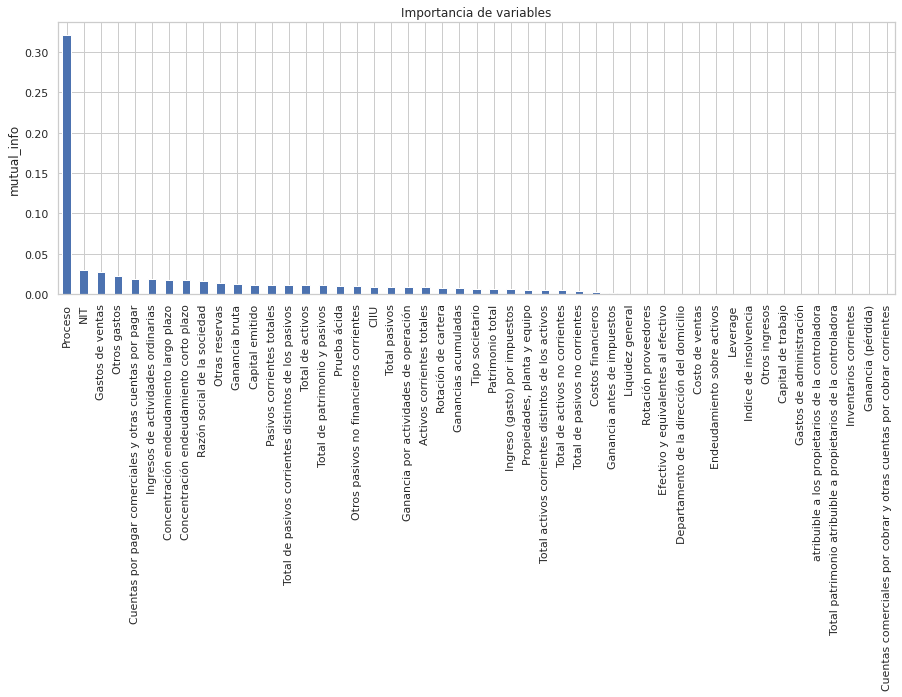

In [56]:
mutual.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Importancia de variables')
plt.ylabel('mutual_info')
plt.show()

Las variables más influyentes del Dataset son: procesos, gastos de ventas, cuentas por pagar y los indicadores de endeudamiento.

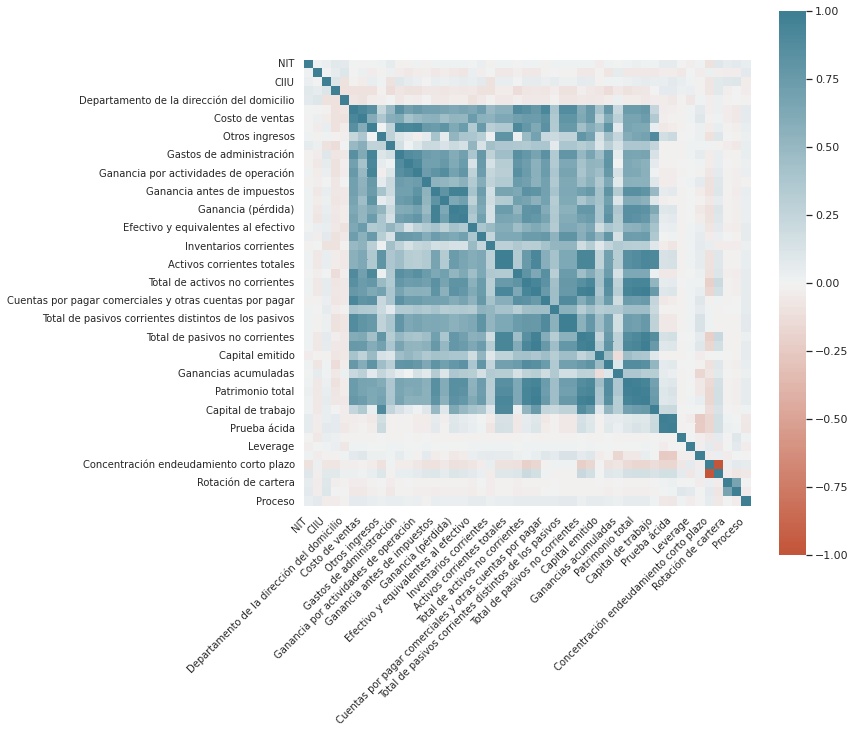

In [57]:
#Cálculo de correlación entre variables o atributos
corr= Datos_Escalados_Estandar.corr()

#Gráfico de las correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(corr,annot= False,cbar= True,annot_kws = {"size": 10},vmin= -1,vmax= 1,center= 0,cmap= sns.diverging_palette(20, 220, n=200),
    square= True,ax= ax)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment = 'right')

ax.tick_params(labelsize = 10)

La gráfica de correlación presenta una diagonal bastante marcada, la mayoria de las variables que tienen una correlación fuerte son los indicadores financieros.

# Conclusiones



*   El dataset es desbalanceado y esto debe tenerse en cuenta a la hora de realizar iteraciones y modelar.
*   Los indicadores financieros presentan una correlación importante con otras variables.
*   Fue necesario quitar los datos atípicos más distantes para no afectar el rendimiento del modelo.




 
